### Task1:
Develop a ML model based on KNN algorithm that can predict the heart disease in a person.
Use heart.csv data set for developing ML model.

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('heart_disease_data.csv')

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose the value of k (number of neighbors)
k = 7

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Choose the best value of k based on the plot
print(f'Accuracy: {accuracy}')


Accuracy: 0.9180327868852459


### Task2:
Using Cosine similarity matrix, develop a movie recommender system that recommend similar
types of movies based on their genre, plot, and language. Use IMDBdata_MainData.csv dataset
for the recommender system.

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
movies_data = pd.read_csv('imdb_movies.csv')

# Combine relevant features into a single column for text-based similarity
movies_data['combined_features'] = movies_data['genre'] + ' ' + movies_data['overview'] + ' ' + movies_data['orig_lang']

# Handle missing values in 'combined_features'
movies_data['combined_features'].fillna('', inplace=True)

# Use CountVectorizer to convert text data into numerical vectors
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(movies_data['combined_features'])

# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(count_matrix, count_matrix)

# Function to get movie recommendations based on similarity
def get_recommendations(movie_title, cosine_sim_matrix, movies_data):
    movie_index = movies_data.index[movies_data['names'] == movie_title].tolist()[0]
    similar_movies = list(enumerate(cosine_sim_matrix[movie_index]))

    # Sort the movies based on similarity scores
    sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)

    # Get the top 5 recommendations (excluding the input movie itself)
    recommended_movies = [(movies_data['names'][i], sorted_similar_movies[i][1]) for i in range(1, 6)]

    return recommended_movies

# Example: Get recommendations for a movie title
movie_title = "Heart and Souls"
recommendations = get_recommendations(movie_title, cosine_sim_matrix, movies_data)

# Display the recommendations
print(f"Recommendations for '{movie_title}':")
for movie, similarity in recommendations:
    print(f"{movie} (Similarity Score: {similarity:.2f})")


Recommendations for 'Heart and Souls':
Avatar: The Way of Water (Similarity Score: 0.31)
The Super Mario Bros. Movie (Similarity Score: 0.30)
Mummies (Similarity Score: 0.29)
Supercell (Similarity Score: 0.28)
Cocaine Bear (Similarity Score: 0.27)


### Task3:
Use Mahalanobis distance and detects the outlier rows in the Diabetes data set. Choose 95%
confidence interval for detecting outlier rows.

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

# Load the Diabetes dataset (replace 'path/to/diabetes.csv' with the actual path)
diabetes_data = pd.read_csv('diabetes.csv')

# Extract the features (excluding the outcome variable)
X = diabetes_data.drop('Outcome', axis=1)

# Fit Minimum Covariance Determinant (MCD) to estimate the robust covariance matrix
mcd = MinCovDet()
mcd.fit(X)

# Calculate Mahalanobis distances
mahalanobis_distances = mcd.mahalanobis(X)

# Set the significance level for outlier detection (e.g., 95% confidence interval)
alpha = 0.05
threshold = chi2.ppf(1 - alpha, df=X.shape[1])  # Chi-squared critical value

# Detect outliers
outliers = diabetes_data[mahalanobis_distances > threshold]

# Display the outliers
print("Outlier Rows:")
outliers


Outlier Rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
763,10,101,76,48,180,32.9,0.171,63,0


### Task4:
Draw KD-tree using Speed-Agility data.

Indices of 2 closest neighbors: [[40 35]]
Distances to 2 closest neighbors: [[0.25       0.51662365]]


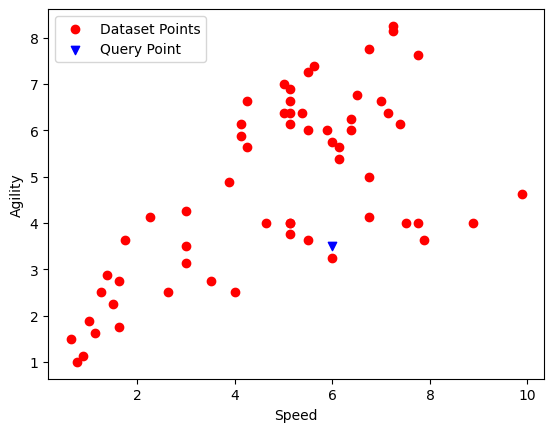

In [28]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt

# Read the data from Agility_Speed.csv
data = pd.read_excel('toughestsport.xlsx')
df = pd.DataFrame(data)

# Extract 'Speed' and 'Agility' columns
x = df['SPD']
y = df['AGI']

# Create a list of points
X = list(zip(x, y))

# Build KD-tree
tree = KDTree(X, leaf_size=2)

# Query for the 2 nearest neighbors to [6, 3.5]
dist, ind = tree.query([[6, 3.5]], k=2)
print("Indices of 2 closest neighbors:", ind)
print("Distances to 2 closest neighbors:", dist)

# Scatter plot of the dataset and the query point
plt.scatter(x, y, color='red', marker='o', label='Dataset Points')
plt.scatter(6, 3.5, color='blue', marker='v', label='Query Point')
plt.xlabel('Speed')
plt.ylabel('Agility')
plt.legend()
plt.show()


### Task5:
plot KD-tree partitions on graph using Speed-Agility data.

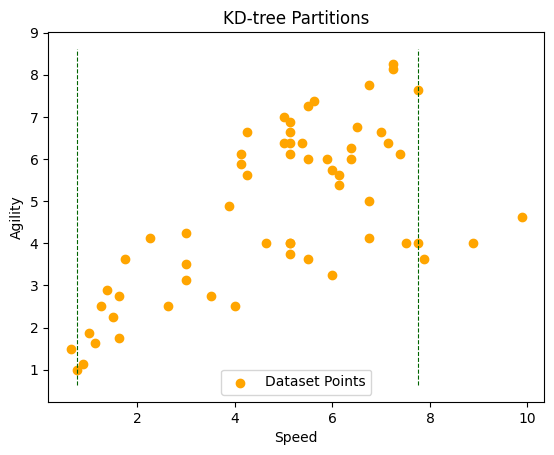

In [7]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_excel('toughestsport.xlsx')
df = pd.DataFrame(data)

# Extract 'SPD' and 'AGI' columns
x = df['SPD']
y = df['AGI']

# Create a list of points
X = np.array(list(zip(x, y)))

# Build KD-tree
tree = KDTree(X, leaf_size=2)

# Function to plot KD-tree partitions
def plot_kdtree_partitions(node, depth, bbox):
    if node.data.shape[0] > 1:
        bbox = np.array(bbox).reshape(1, -1)  # Reshape bbox to 2D
        left_indices = node.query(bbox[:, [0, 2]], return_distance=False)[0]
        right_indices = node.query(bbox[:, [1, 3]], return_distance=False)[0]

        left_bbox = [np.min(X[left_indices, 0]), np.max(X[left_indices, 0]), np.min(X[left_indices, 1]), np.max(X[left_indices, 1])]
        right_bbox = [np.min(X[right_indices, 0]), np.max(X[right_indices, 0]), np.min(X[right_indices, 1]), np.max(X[right_indices, 1])]

        if depth % 2 == 0:
            plt.plot([X[left_indices[-1], 0], X[left_indices[-1], 0]], [bbox[0, 2], bbox[0, 3]], c='darkgreen', linestyle='--', linewidth=0.8)
        else:
            plt.plot([bbox[0, 0], bbox[0, 1]], [X[left_indices[-1], 1], X[left_indices[-1], 1]], c='darkgreen', linestyle='--', linewidth=0.8)

        plot_kdtree_partitions(tree.query(X[left_indices], return_distance=False), depth + 1, left_bbox)

        if depth % 2 == 0:
            plt.plot([X[right_indices[0], 0], X[right_indices[0], 0]], [bbox[0, 2], bbox[0, 3]], c='darkgreen', linestyle='--', linewidth=0.8)
        else:
            plt.plot([bbox[0, 0], bbox[0, 1]], [X[right_indices[0], 1], X[right_indices[0], 1]], c='darkgreen', linestyle='--', linewidth=0.8)

        plot_kdtree_partitions(tree.query(X[right_indices], return_distance=False), depth + 1, right_bbox)

# Scatter plot of the dataset
plt.scatter(x, y, color='orange', marker='o', label='Dataset Points')

# Plot KD-tree partitions
plot_kdtree_partitions(tree, 0, plt.axis())

plt.xlabel('Speed')
plt.ylabel('Agility')
plt.title('KD-tree Partitions')
plt.legend()
plt.show()
